# Recap of The Excercise of last week

### 1. Visualize the first 5 PCs of the MNIST dataset ([link for download](https://drive.google.com/drive/folders/1HR09EbEJuhfCcKvJA0xXMDyVyMyRcuaa?usp=sharing)).

You only need to download the `mnist_train.csv` dataset.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random_seed = 42

In [27]:
from sklearn.decomposition import PCA

In [29]:
images = pd.read_csv("mnist_train.csv").values[:, 1:].reshape(-1, 28, 28)
labels = pd.read_csv("mnist_train.csv").values[:, 0]

In [30]:
images.shape

(60000, 28, 28)

In [31]:
images.reshape(images.shape[0], -1).shape

(60000, 784)

In [32]:
pca = PCA(n_components=5)
pca.fit(images.reshape(images.shape[0], -1))

PCA(n_components=5)

In [34]:
pca.components_.shape

(5, 784)

In [35]:
PCs = pca.components_.reshape(-1, 28, 28)

In [36]:
PCs.shape

(5, 28, 28)

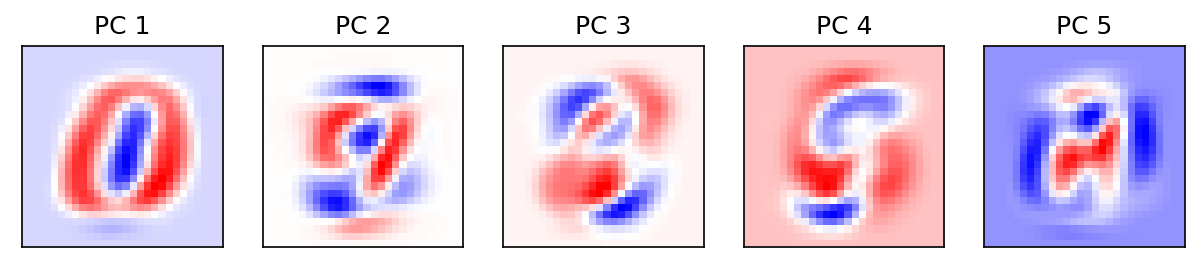

In [37]:
fig, axes = plt.subplots(1, 5, figsize=(10, 2), dpi=150)

for i, ax in enumerate(axes.flat):
    ax.imshow(PCs[i], cmap='bwr')
    ax.set(xticks=[], yticks=[])
    ax.set_title(f"PC {i+1}")

### 2. Project the data onto the first two PCs and visualize it. 
Visualize the MNIST samples in a scatter plot where x-axis is PC1 and y-axis is PC2. Color-code each sample based on its label (i.e. number).

In [39]:
images.reshape(images.shape[0], -1).shape

(60000, 784)

In [40]:
reduced_samples = pca.transform(images.reshape(images.shape[0], -1))[:, :2]

In [41]:
# generate colors for each unique label
colors = sns.color_palette("Paired", n_colors=len(np.unique(labels)))

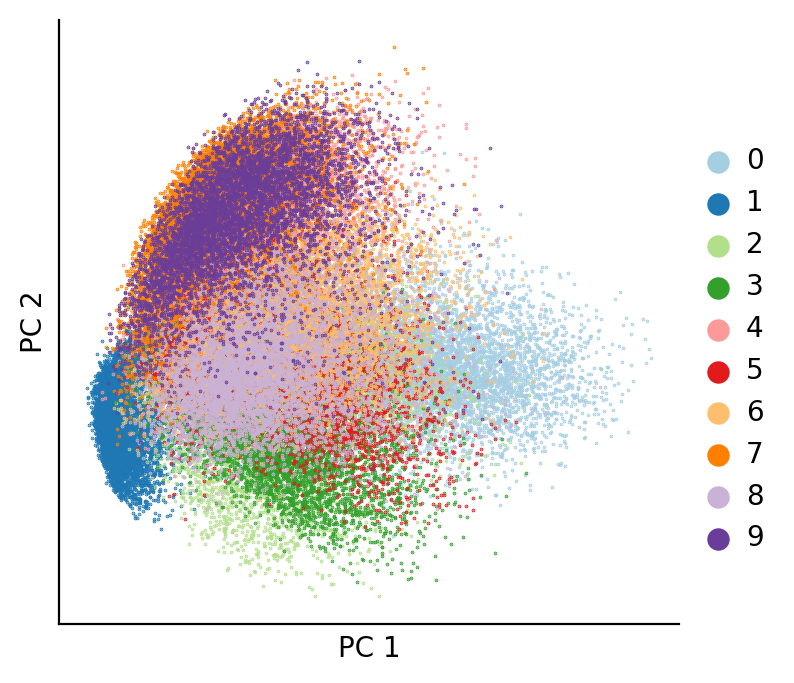

In [42]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
for unique_label in np.unique(labels):
    ax.scatter(*reduced_samples[labels==unique_label].T, s=.1, color=colors[unique_label], label=unique_label)

ax.set(xticks=[], yticks=[], xlabel="PC 1", ylabel="PC 2")
sns.despine(trim=True)
lgnd = ax.legend(loc=(1., 0.1), frameon=False, handletextpad=0.)
for h in lgnd.legendHandles:
    h.set_sizes([50])

---

# Kernel PCA

- PCA relies on eigenvectors of the covariance matrix:  $ XX^{T}$ 
- The Kernel PCA replaces the Covariance matrix in a new feature space, the kernel Matrix K:
$K = \phi (X)\phi (X^{T})$ 
- Phi ($\phi$) is the kernel function, and can be nonlinear.
$
\begin{bmatrix}
phi(X_{1}, X_{1}) & phi(X_{1}, X_{2})\\
phi(X_{2}, X_{1}) & phi(X_{2}, X_{2})
\end{bmatrix}
$

- a popular kernel is the radial basis function kernel
$
K\left(\mathbf{x}, \mathbf{x}^{\prime}\right)=\exp \left(-\frac{\left\|\mathbf{x}-\mathbf{x}^{\prime}\right\|^{2}}{2 \sigma^{2}}\right)
$

- We can thus project the data into an nonlinear feature space

- The Kernel matrix scales only with the number of datapoints n, as opposed to the number of dimensions d in PCA


### When to use kPCA

- When a projection into a nonlinear feature space would lead to better linear separability
- When the d >> n, PCA becomes intractable

## Practical Example

In [43]:
# import necessary libraries
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA

In [44]:
# get coordinates and class labels of 2 circles
X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)

print(X.shape, y.shape)

(1000, 2) (1000,)


Text(0.5, 1.0, 'Complete Data')

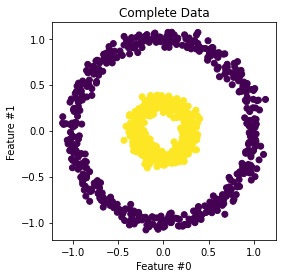

In [48]:
_, ax = plt.subplots(1,1, figsize=(4, 4))

ax.scatter(X[:, 0], X[:, 1], c=y)
ax.set_ylabel("Feature #1")
ax.set_xlabel("Feature #0")
ax.set_title("Complete Data")

In [49]:
# get training and testing data as well as the splits
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [50]:
X_train.shape

(750, 2)

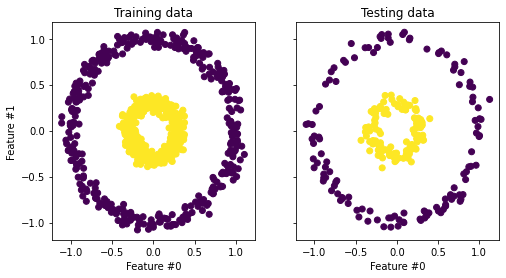

In [51]:
import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

#### set up the Dimensionality Reduction Methods

In [52]:
pca = PCA(n_components=2)

In [56]:
kernel_pca = KernelPCA( 
    n_components=2, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

#### fit the data

In [57]:
X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

#### Show the Results

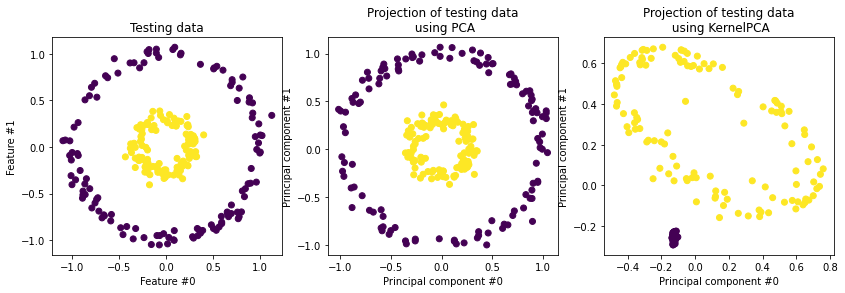

In [58]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))

axs[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test)
axs[0].set_ylabel("Feature #1")
axs[0].set_xlabel("Feature #0")
axs[0].set_title("Testing data")

axs[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
axs[1].set_ylabel("Principal component #1")
axs[1].set_xlabel("Principal component #0")
axs[1].set_title("Projection of testing data\n using PCA")

axs[2].scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
axs[2].set_ylabel("Principal component #1")
axs[2].set_xlabel("Principal component #0")
axs[2].set_title("Projection of testing data\n using KernelPCA");

adapted from https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py

---

# Independent Component Analysis (ICA)

Used in the Blind Source Separation (BSS) or Cocktail party problem

### The Goals of ICA are:

- Find features (y) that are independent from each other (Mutual Information of y_1, y_2 is minimal)
- Find features such that maximize the mutual information between the whole data X and the features y

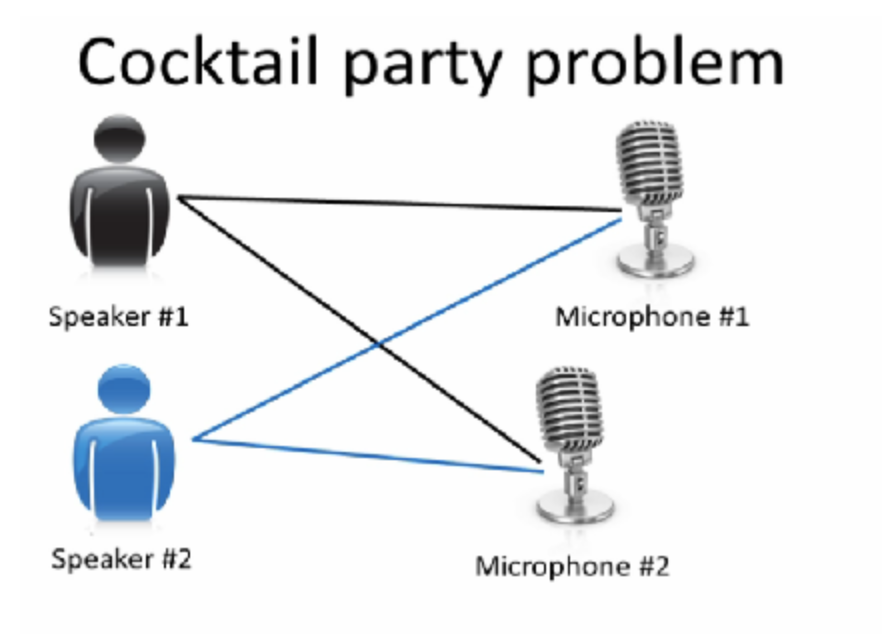

In [20]:
from IPython.display import Image
Image("BSS_illustration.png")

# from https://github.com/ShashShukla/ICA

# Exercise #1 

fill in the textboxes with an [x] or [v] if you think this property is **absent** or **present** in these dimensionality reduction techniques

### PCA  <--------> ICA

[] --- mutually orthogonal --- [] 


[] -- mutually independent -- []


[] ----- maximal variance ---- []


[] maximal mutual information []


[] ----- ordered features ----- []

# Solution # 1

[v] --- mutually orthogonal --- [x] 


[x] -- mutually independent -- [v]


[v] ----- maximal variance ---- [x]


[x] maximal mutual information [v]


[v] ----- ordered features ----- []

some details
- sometimes PCA finds uncorrelated dimensions, if it finds orthogonal gaussians, it finds mutually indepent features
- maximal mutual information and maximal reconstruction are not the same.
- ICA does have no notion of what are more important features, so they are unordered


# Practical Example of PCA and ICA

### Eigenfaces

In [60]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn import decomposition

In [61]:

n_row, n_col = 2, 3
image_shape = (64, 64)

In [63]:
# Load faces data
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=42)

In [64]:
faces.shape

(400, 4096)

In [65]:
n_samples, n_features = faces.shape

In [66]:
# global centering: subtract the overall mean
faces_centered = faces - faces.mean(axis=0)

# local centering: subtract the mean of each image from itself
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

In [67]:
print(f"Dataset consists of {n_samples} faces")

Dataset consists of 400 faces


### Define plotting helper function

In [68]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2.0 * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(
            comp.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.0)

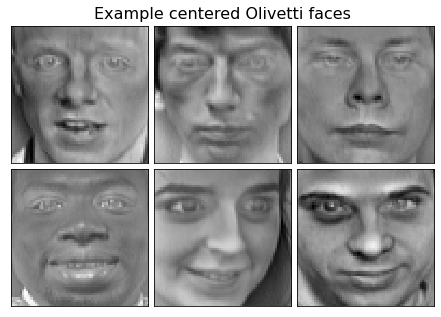

In [71]:
plot_gallery("Example centered Olivetti faces", faces_centered[0:6])

# Fit PCA and ICA

In [72]:
n_components = 6

In [73]:
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True)
pca.fit(faces_centered)
pca_components = pca.components_

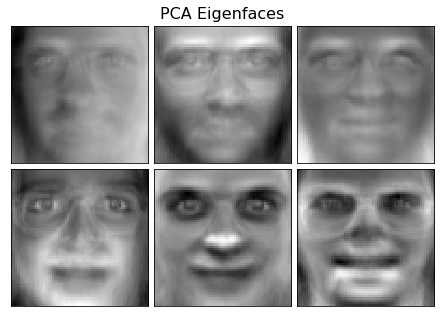

In [74]:
plot_gallery("PCA Eigenfaces", pca_components[:n_components])

In [76]:
ica = decomposition.FastICA(n_components=n_components, whiten=True)
ica.fit(faces_centered)
ica_components = ica.components_

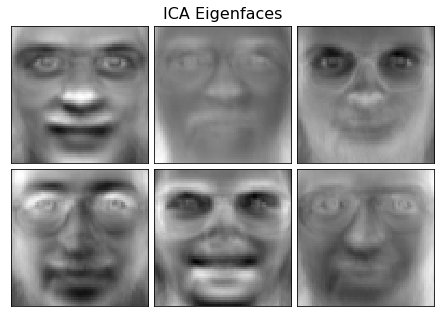

In [77]:
plot_gallery("ICA Eigenfaces", ica_components[:n_components])

adapted from https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html

---

# Data Reconstruction with PCA and Autoencoders

In [80]:
from scipy import stats

from sklearn import datasets
from sklearn.datasets import fetch_openml

In [81]:
# define lecture colors
goe_blue = '#003665'
light_blue = '#BDCEE3'
neonblue = '#04D9FF'

# secondary colors
sec_dark_blue = '#006597'
sec_mid_blue = '#0093c7'
cs_orange = '#e07f41'
grey4 = '#DADADA'

we still have the MNIST dataset from above

In [82]:
h, w = (28, 28)

In [84]:
images.shape

(60000, 28, 28)

In [85]:
labels.shape

(60000,)

In [88]:
X = images.reshape(-1, h*w)
y = labels
X38 = X[(y == 3) | (y == 8)]
y38 = y[(y == 3) | (y == 8)]

In [90]:
n_images = 8

In [91]:
# initialize large image that we will fill with examples
I = np.zeros((n_images * h, n_images * w))
I.shape

(224, 224)

In [92]:
k = 0
for i in range(8):
    for j in range(8):
        x = X38[k, ...].reshape((h, w))
        I[i*h:(i+1)*h, j*w:(j+1)*w] = x
        k += 1

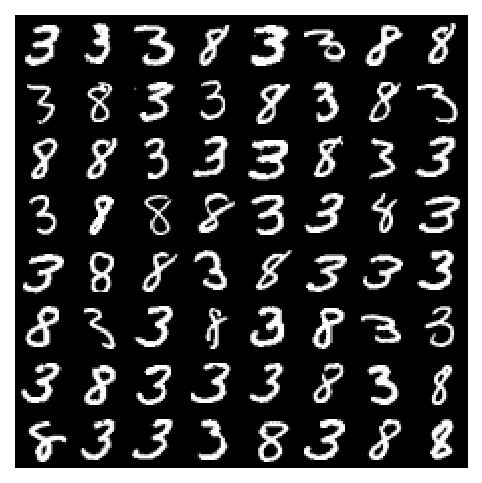

In [93]:
sns.set_context('talk')
with sns.axes_style('white'):
    fig, ax = plt.subplots(dpi=150)
    ax.matshow(I, cmap='gray')
    ax.axis(False)

## Show the overall mean image

(11982, 784)

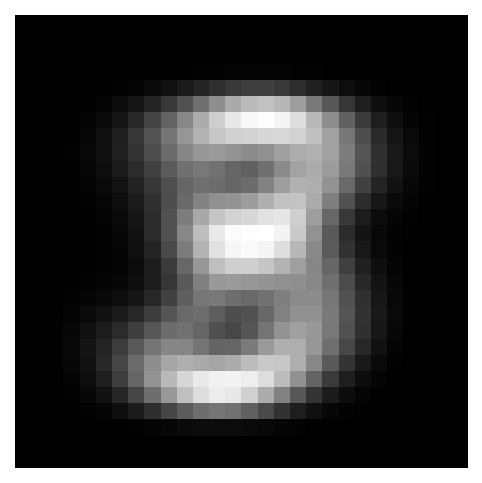

In [94]:
mu38 = X38.mean(axis=0, keepdims=True)

sns.set_context('talk')
with sns.axes_style('white'):
    fig, ax = plt.subplots(dpi=150)
    ax.matshow(mu38.reshape((28, 28)), cmap='gray')
    ax.axis(False)
    
Xc38 = X38 - mu38
Xc38.shape

### show individual images with subtracted mean

In [95]:
k = 0
for i in range(8):
    for j in range(8):
        x = Xc38[k, ...].reshape((h, w))
        I[i*h:(i+1)*h, j*w:(j+1)*w] = x
        k += 1

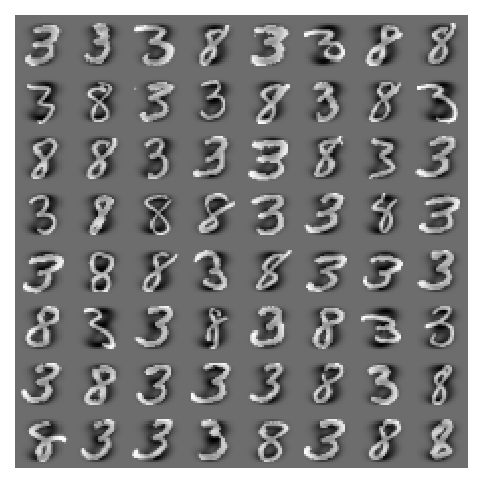

In [96]:
sns.set_context('talk')
with sns.axes_style('white'):
    fig, ax = plt.subplots(dpi=150)
    ax.matshow(I, cmap='gray')
    ax.axis(False)

# Compute Covariance

In [97]:
# reshaping into n x dim
Xc38 = Xc38.reshape(-1, h * w)

m, _ = Xc38.shape
C = 1/m * Xc38.T @ Xc38
C.shape

(784, 784)

# Compute Eigendecomposition

In [98]:
v, W = np.linalg.eig(C)
v = v.real # remove complex components
W = W.real

## Project data

In [99]:
n_components = 2
Z = Xc38 @ W[:, :n_components]
Z.shape

(11982, 2)

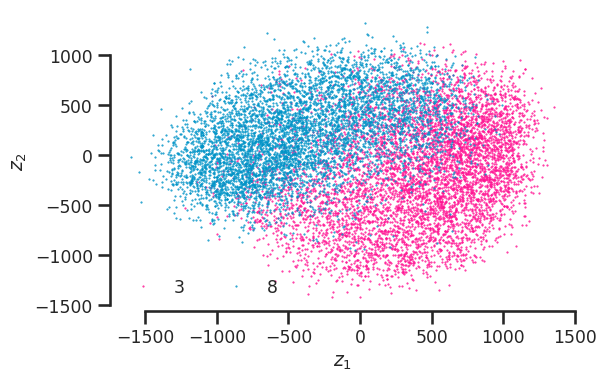

In [101]:
sns.set_context('talk', font_scale=.75)
with sns.axes_style('ticks'):
    fig, ax = plt.subplots(dpi=100)
    for label, color in zip([3, 8], ['deeppink', sec_mid_blue]):
        ax.plot(Z[y38 == label, 0], Z[y38 == label, 1], '.', color=color, ms=1, label=f'{label}')
    ax.legend(frameon=False, ncol=2)
    ax.set(
        xlabel=r'$z_1$', 
        ylabel=r'$z_2$'
    )
    sns.despine(trim=True)

## Plot principal components

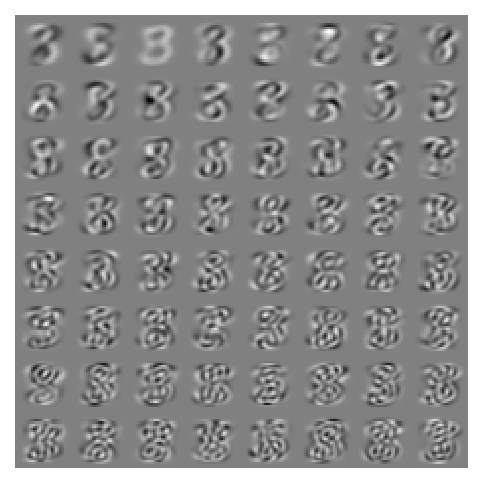

In [102]:
k = 0
for i in range(8):
    for j in range(8):
        x = W[:, k].reshape((28,28))
        I[i*28:(i+1)*28, j*28:(j+1)*28] = x
        k += 1
sns.set_context('talk')
with sns.axes_style('white'):
    fig, ax = plt.subplots(dpi=150)
    ax.matshow(I, cmap='gray')
    ax.axis(False)

# Reconstruct Digits

In [103]:
Z.shape

(11982, 2)

In [105]:
m, k = Z.shape
Xrec = Z @ W[:, :k].T + mu38
Xrec.shape, np.max(np.abs(X38 - Xrec))

((11982, 784), 305.24348401100303)

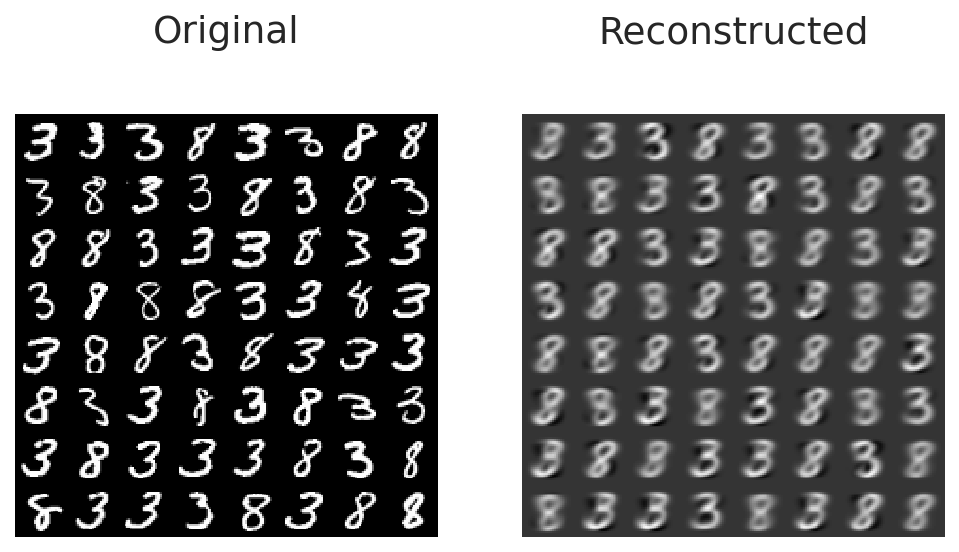

In [106]:
k = 0
for i in range(8):
    for j in range(8):
        x = X38[k].reshape((28,28))
        I[i*28:(i+1)*28, j*28:(j+1)*28] = x
        k += 1
sns.set_context('talk')
with sns.axes_style('white'):
    fig, ax = plt.subplots(1, 2, figsize=(8,5), dpi=150)
    ax[0].matshow(I, cmap='gray')
    ax[0].axis(False)
    ax[0].set(
        title='Original'
    )    
I = np.zeros((8 * 28, 8*28))
k = 0
for i in range(8):
    for j in range(8):
        x = Xrec[k].reshape((28,28))
        I[i*28:(i+1)*28, j*28:(j+1)*28] = x
        k += 1
sns.set_context('talk')
with sns.axes_style('white'):
    ax[1].matshow(I, cmap='gray')
    ax[1].axis(False)
    ax[1].set(
        title='Reconstructed'
    )

# Reconstruct with more components

In [108]:
k = 85
Xrec = Xc38 @ W[:, :k] @ W[:, :k].T + mu38

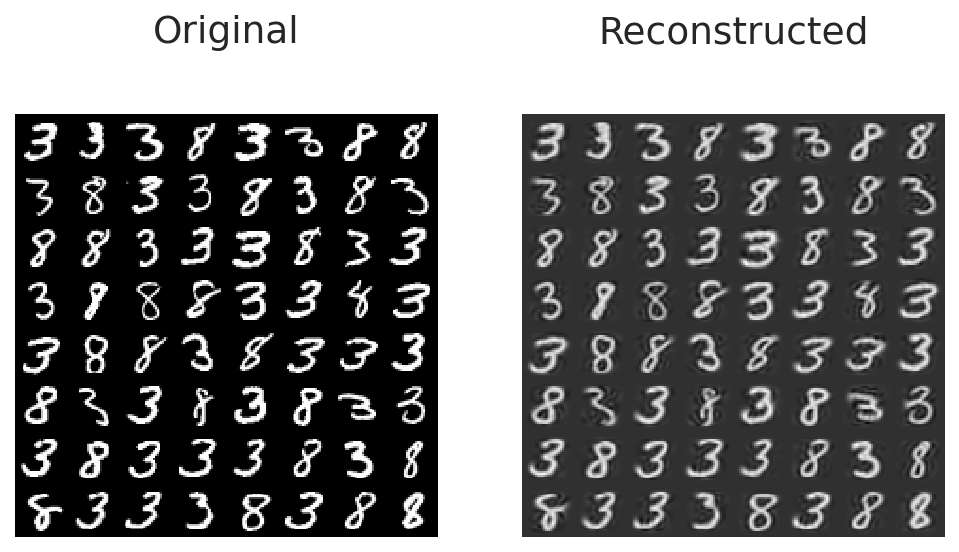

In [109]:
I = np.zeros((8 * 28, 8*28))
k = 0
for i in range(8):
    for j in range(8):
        x = X38[k].reshape((28,28))
        I[i*28:(i+1)*28, j*28:(j+1)*28] = x
        k += 1
sns.set_context('talk')
with sns.axes_style('white'):
    fig, ax = plt.subplots(1, 2, figsize=(8,5), dpi=150)
    ax[0].matshow(I, cmap='gray')
    ax[0].axis(False)
    ax[0].set(
        title='Original'
    )    
I = np.zeros((8 * 28, 8*28))
k = 0
for i in range(8):
    for j in range(8):
        x = Xrec[k].reshape((28,28))
        I[i*28:(i+1)*28, j*28:(j+1)*28] = x
        k += 1
sns.set_context('talk')
with sns.axes_style('white'):
    ax[1].matshow(I, cmap='gray')
    ax[1].axis(False)
    ax[1].set(
        title='Reconstructed'
    )

# Plot spectrum

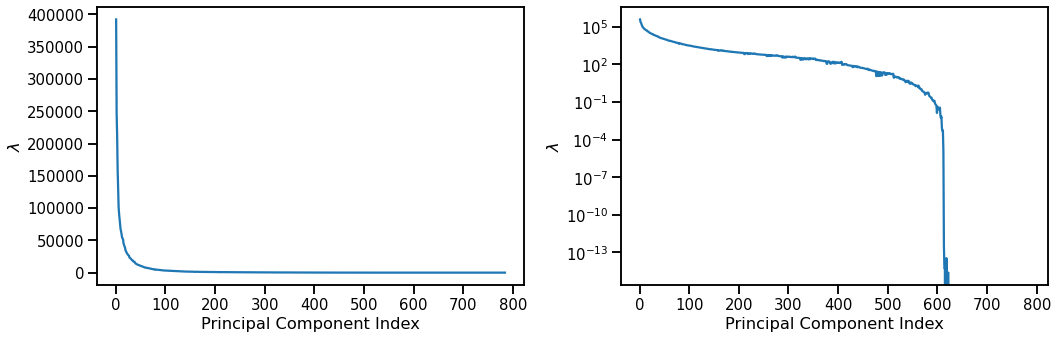

In [110]:
sns.set_context('talk', font_scale=.9)
fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].plot(np.arange(len(v))+1, v)
axs[0].set(
    xlabel=r'Principal Component Index', 
    ylabel=r'$\lambda$'
)


axs[1].plot(np.arange(len(v))+1, v)
axs[1].set(
    xlabel=r'Principal Component Index', 
    ylabel=r'$\lambda$'
)
axs[1].set_yscale('log')
fig.tight_layout()

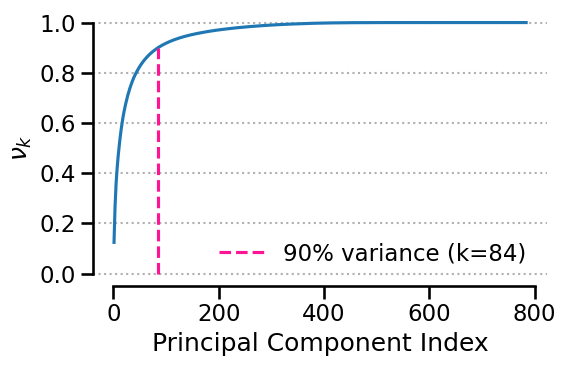

In [111]:
sns.set_context('talk')

fig, ax = plt.subplots(dpi=100)

cumv =  np.cumsum(v)/np.sum(v)
idx = np.arange(len(v))+1
ax.plot(idx, cumv)

ax.set(
    xlabel=r'Principal Component Index', 
    ylabel=r'$\nu_k$',
)
p90 = np.max(idx[cumv < .9])

ax.plot([p90, p90], [0, cumv[p90]], '--', color='deeppink', 
       label=f'90% variance (k={p90})')
ax.yaxis.grid(True, linestyle=':')

ax.legend(frameon=False)
sns.despine(trim=True)
fig.tight_layout()

# Nonlinear Autoencoder

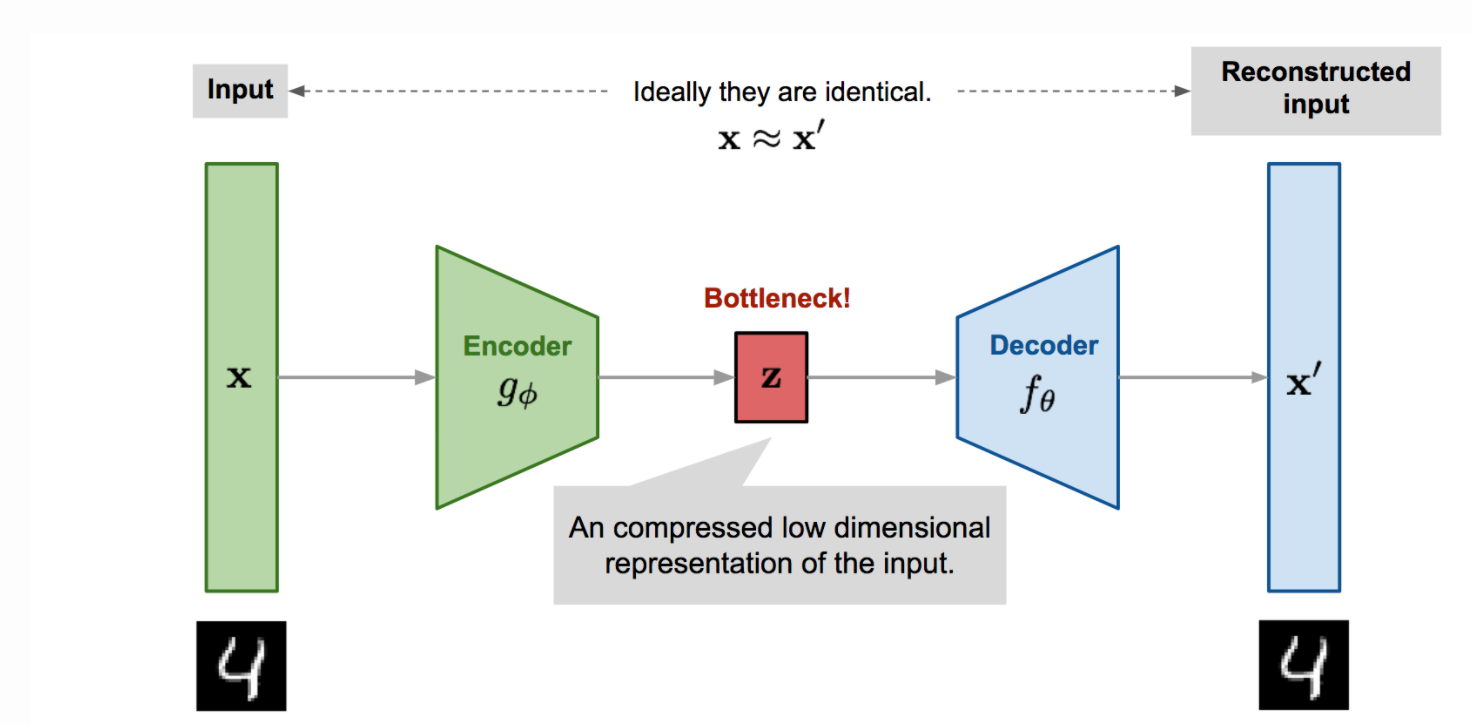

In [60]:
Image("Autoencoder.png")

# from https://lilianweng.github.io/lil-log/2018/08/12/from-autoencoder-to-beta-vae.html

## The Idea Behind Autoencoders

- it learns an identity function in an unsupervised way
- learns to reconstruct the image while compressing the data in the process
- discoveres efficient and compressed representations
- Usually, Encoder and Decoder are neural networks, either multi-layer-perceptrons (MLPs) or convolutional neural networks (CNNs)

### Benefits

The Autoencoder is incredibly powerful, it allows for:
- generating new images (by sampling the latent space)
- denoising
- super resolution
- colorization

In [112]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### Set up the Architecure of the Autoencoder

In [117]:
# Let's Begin with 2 layers for the encoder and the decoder

# Encoder
encoder_sizes = (300, 200)

n_latent = 2

# Decoder structure
decoder_sizes = (200, 300)

### Select the nonlinear activation functions of the MLP

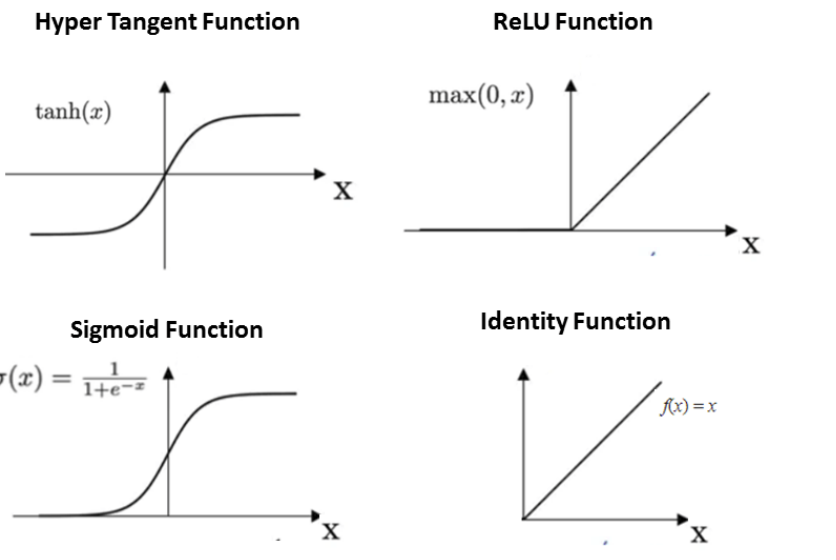

In [118]:
from IPython.display import Image

Image("activation_functions.png")
# from https://doku.lrz.de/download/attachments/56919081/deep_learning_intro.pdf?version=1&modificationDate=1594994196657&api=v2

In [119]:
(*encoder_sizes, n_latent, *decoder_sizes)

(300, 200, 2, 200, 300)

In [146]:
reg = MLPRegressor(hidden_layer_sizes = (*encoder_sizes, n_latent, *decoder_sizes), 
                   activation='tanh', 
                   learning_rate_init=.0001, 
                   max_iter=20, 
                   verbose=True)

In [147]:
import scipy

In [148]:
# get the range of values of our images between -1 and 1, which helps to train neural networks
Xc38_normalized = Xc38 / np.max(np.abs(Xc38))

In [149]:
train_x, test_x, train_y, test_y = train_test_split(Xc38_normalized, y38, test_size=0.2, random_state=42)

In [150]:
reg.fit(train_x, train_x)


Iteration 1, loss = 0.03199071
Iteration 2, loss = 0.02739937
Iteration 3, loss = 0.02578012
Iteration 4, loss = 0.02543869
Iteration 5, loss = 0.02532378
Iteration 6, loss = 0.02525677
Iteration 7, loss = 0.02521155
Iteration 8, loss = 0.02518412
Iteration 9, loss = 0.02515918
Iteration 10, loss = 0.02514377
Iteration 11, loss = 0.02513221
Iteration 12, loss = 0.02512274
Iteration 13, loss = 0.02511588
Iteration 14, loss = 0.02510817
Iteration 15, loss = 0.02510656
Iteration 16, loss = 0.02510063
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(activation='tanh', hidden_layer_sizes=(300, 200, 2, 200, 300),
             learning_rate_init=0.0001, max_iter=20, verbose=True)

## Visualize training

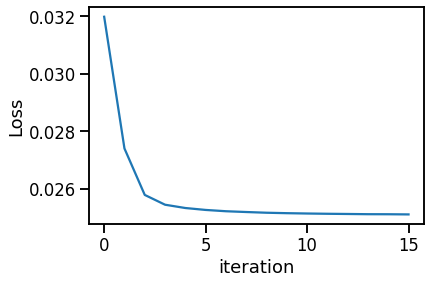

In [151]:
plt.plot(reg.loss_curve_)
plt.ylabel("Loss")
plt.xlabel("iteration");

## Show Reconstructions

In [152]:
xhat = reg.predict(test_x) * 255 + mu38

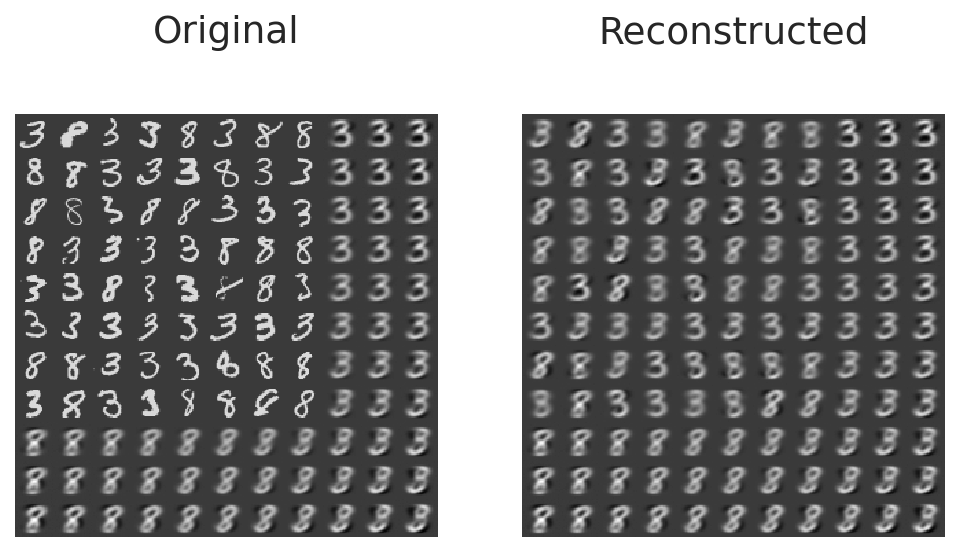

In [153]:
tmp = test_x * 255 + mu38

k = 0
for i in range(8):
    for j in range(8):
        x = tmp[k].reshape((28,28))
        I[i*28:(i+1)*28, j*28:(j+1)*28] = x
        k += 1
        
sns.set_context('talk')
with sns.axes_style('white'):
    fig, ax = plt.subplots(1, 2, figsize=(8,5), dpi=150)
    ax[0].matshow(I, cmap='gray')
    ax[0].axis(False)
    ax[0].set(
        title='Original'
    )    

    
k = 0
for i in range(8):
    for j in range(8):
        x = xhat[k].reshape((28,28))
        I[i*28:(i+1)*28, j*28:(j+1)*28] = x
        k += 1
sns.set_context('talk')
with sns.axes_style('white'):
    ax[1].matshow(I, cmap='gray')
    ax[1].axis(False)
    ax[1].set(
        title='Reconstructed'
    )

# Getting Latent Representations

In [156]:
def encoder(data):
    data = np.asmatrix(data)
    
    # apply the weights and biases of the first layer
    out1 = data*reg.coefs_[0] + reg.intercepts_[0]
    # tanh
    out1 = np.tanh(out1)
    
    # similar procedue for all other layers
    out2 = out1*reg.coefs_[1] + reg.intercepts_[1]
    out2 = np.tanh(out2)
    
    latent = out2*reg.coefs_[2] + reg.intercepts_[2]
    latent = np.tanh(latent)
    
    return np.asarray(latent)

In [157]:
test_x.shape

(2397, 784)

In [158]:
Z = encoder(test_x)
Z

array([[-0.30777649,  0.26450934],
       [ 0.17128319,  0.80107477],
       [-0.41121168, -0.01221164],
       ...,
       [-0.62845019, -0.0790345 ],
       [ 0.16342129, -0.69395958],
       [ 0.47493554, -0.51697255]])

In [159]:
Z.shape

(2397, 2)

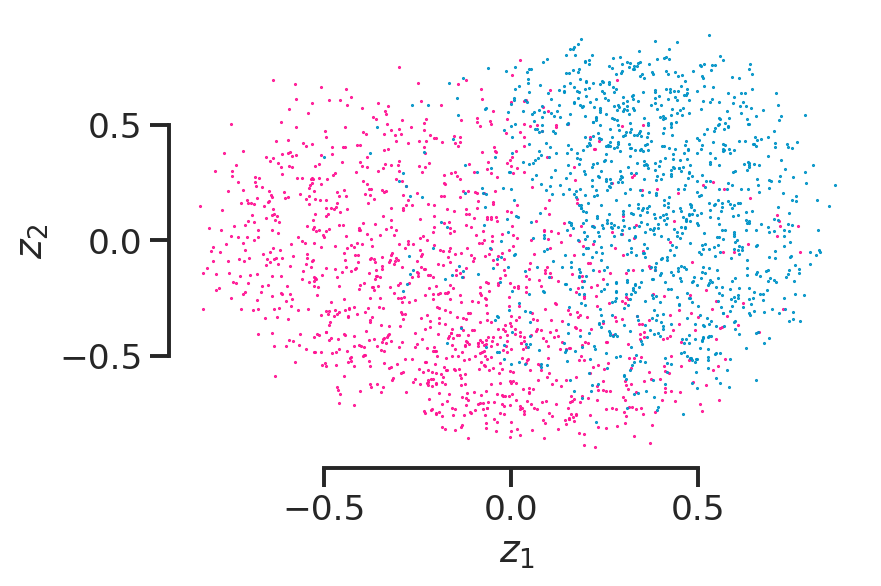

In [160]:
sns.set_context('talk')
with sns.axes_style('ticks'):
    fig, ax = plt.subplots(dpi=150)
    for label, color in zip([3, 8], ['deeppink', sec_mid_blue]):
        ax.plot(Z[test_y == label, 0], Z[test_y == label, 1], '.', color=color, ms=1, label=f'{label}')
#     ax.legend(frameon=False, ncol=2)
    ax.set(
        xlabel=r'$z_1$', 
        ylabel=r'$z_2$'
    )
    sns.despine(trim=True)

# Explore the latent space: Generate new examples

In [161]:
def decoder(new_data):
    new_data = np.asmatrix(new_data)
    
    # now we are moving from the latent back to the image
    decoder2 = new_data*reg.coefs_[3] + reg.intercepts_[3]
    decoder2 = np.tanh(decoder2)

    decoder1 = decoder2*reg.coefs_[4] + reg.intercepts_[4]
    decoder1 = np.tanh(decoder1)

    reconst = decoder1*reg.coefs_[5] + reg.intercepts_[5]
    reconst = np.tanh(reconst)

    return np.asarray(reconst)

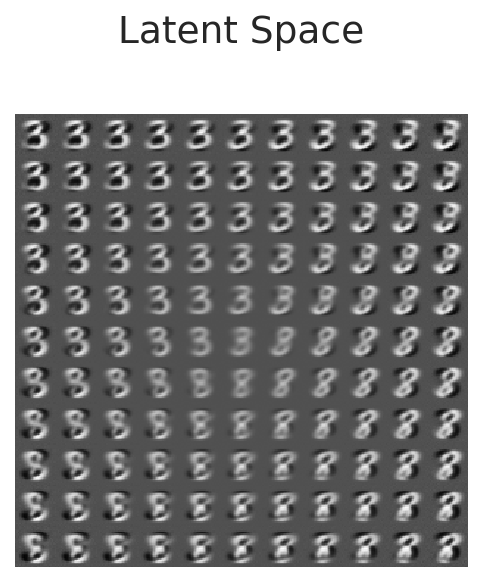

In [162]:
I = np.zeros((11 * 28, 11*28))

tiling = np.linspace(-2, 2, 11)

for i, x in enumerate(tiling):
    for j, y in enumerate(tiling):
        xhat = decoder(np.array([[x, y]])) * 255 + mu38
        xhat = xhat.reshape((28,28))
        I[i*28:(i+1)*28, j*28:(j+1)*28] = xhat

        sns.set_context('talk')
with sns.axes_style('white'):
    fig, ax = plt.subplots(dpi=150)
    ax.matshow(I, cmap='gray')
    ax.axis(False)
    ax.set(
        title='Latent Space'
    )    


Modified from https://i-systems.github.io/teaching/ML/iNotes/15_Autoencoder.html

# Exercise #2 

##  1) Build strictly linear Encoder and Decoder and compare the reconstruction results with PCA

## 2) Try to get the loss as small as possible by using a nonlinear MLP with more layers

## 3) Show that even this well trained model can produce nonsensical outputs when sampling from unseen latent states

---

---

# Time Series

We now switch gears completely and turn our attention to time series data

In [163]:
!pip install statsmodels

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [164]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression


revenue_df = pd.read_csv('https://user.informatik.uni-goettingen.de/~sherbold/online_and_mail_shopping.csv',
                        header = 0, parse_dates = [0], names = ['Month', 'mdollars'], index_col = 0)
revenue_df

,mdollars
Month,
2002-01-01,9912
2002-02-01,8925
2002-03-01,9670
2002-04-01,9684
2002-05-01,9713
...,...
2013-08-01,29297
2013-09-01,28283
2013-10-01,29657


<AxesSubplot:xlabel='Month'>

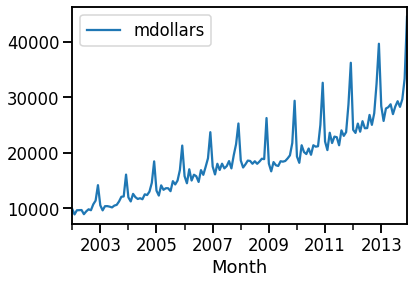

In [165]:
revenue_df.plot()

In [87]:
# let's rearrange our variable y, and create a simple index x
X = np.arange(1,revenue_df.shape[0]+1).reshape(-1, 1)
Y = revenue_df['mdollars'].values.reshape(-1, 1)

# 1. Detrending the Data

### Subtract the general trend

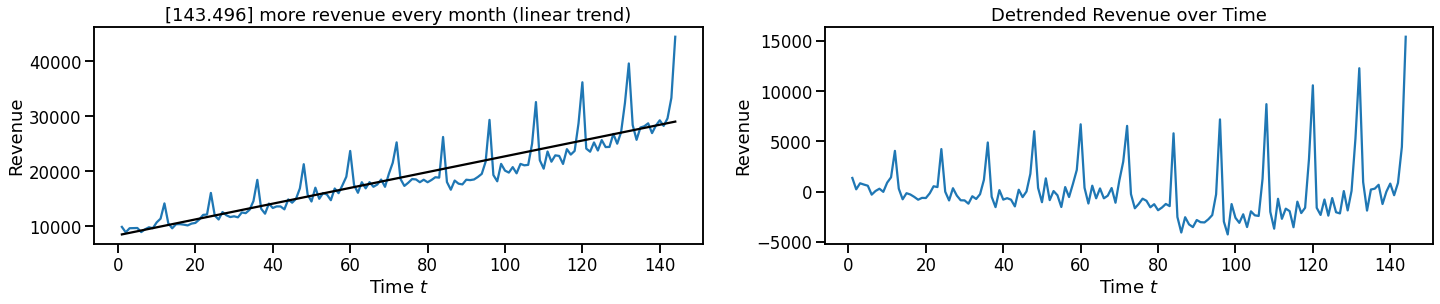

In [99]:
regr = LinearRegression()
ax = regr.fit(X, Y)
T_pred = regr.predict(X)[:,0]
revenue_df['mdollars_lin'] = revenue_df['mdollars']-T_pred

f, axes = plt.subplots(1, 2, figsize=(24, 4))
axes[0].set_title(f'{np.round(regr.coef_[0],3)} more revenue every month (linear trend)')
axes[0].plot(X, Y)
axes[0].plot(X, T_pred, color='black')
axes[0].set_xlabel('Time $t$')
axes[0].set_ylabel('Revenue')

axes[1].set_title('Detrended Revenue over Time')
axes[1].plot(X, revenue_df['mdollars_lin'])
axes[1].set_xlabel('Time $t$')
axes[1].set_ylabel('Revenue')
plt.show()

### Subtract the monthly mean

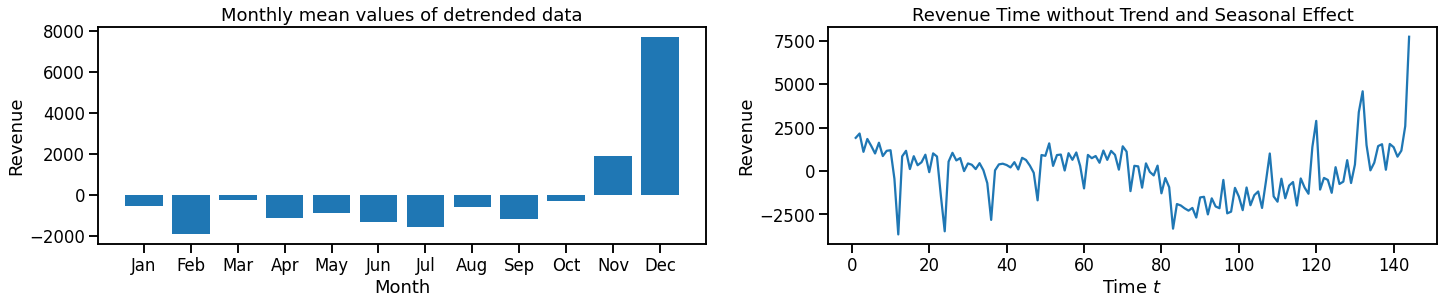

In [100]:
monthly_means = revenue_df['mdollars_lin'].groupby(revenue_df['mdollars_lin'].index.month).mean()

revenue_df['mdollars_lin_adj'] = revenue_df['mdollars_lin'] - np.tile(monthly_means,12)

f, axes = plt.subplots(1, 2, figsize=(24, 4))
axes[0].set_title('Monthly mean values of detrended data')
axes[0].bar(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], monthly_means)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Revenue')

axes[1].set_title('Revenue Time without Trend and Seasonal Effect')
axes[1].plot(X, revenue_df['mdollars_lin_adj'])
axes[1].set_xlabel('Time $t$')
axes[1].set_ylabel('Revenue')
plt.show()

## Detrending with a simple Diff

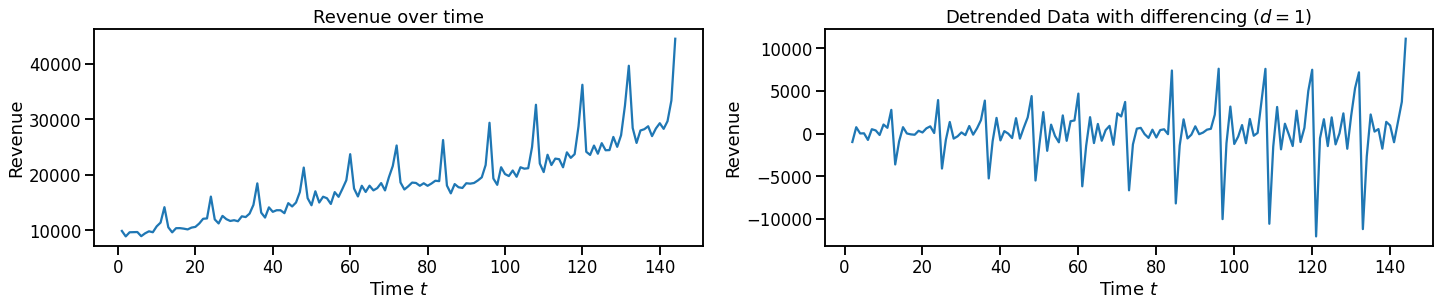

In [101]:
revenue_df['mdollars_diff'] = revenue_df['mdollars'].diff(1)

f, axes = plt.subplots(1, 2, figsize=(24, 4))
axes[0].set_title('Revenue over time')
axes[0].plot(X, Y)
axes[0].set_xlabel('Time $t$')
axes[0].set_ylabel('Revenue')

axes[1].set_title('Detrended Data with differencing ($d=1$)')
axes[1].plot(X, revenue_df['mdollars_diff'])
axes[1].set_xlabel('Time $t$')
axes[1].set_ylabel('Revenue')
plt.show()

In [103]:
revenue_df['mdollars_diff']

Month
2002-01-01        NaN
2002-02-01     -987.0
2002-03-01      745.0
2002-04-01       14.0
2002-05-01       29.0
               ...   
2013-08-01      948.0
2013-09-01    -1014.0
2013-10-01     1374.0
2013-11-01     3724.0
2013-12-01    11119.0
Name: mdollars_diff, Length: 144, dtype: float64

In [105]:
revenue_df

,mdollars,mdollars_lin,mdollars_lin_adj,mdollars_diff,mdollars_diff_adj
Month,,,,,
2002-01-01,9912,1366.383525,1906.065561,NaN,NaN
2002-02-01,8925,235.887582,2154.065561,-987.0,NaN
2002-03-01,9670,837.391639,1101.065561,745.0,NaN
2002-04-01,9684,707.895696,1840.898895,14.0,NaN
2002-05-01,9713,593.399754,1445.065561,29.0,NaN
...,...,...,...,...,...
2013-08-01,29297,805.447469,1369.601105,948.0,-1420.0
2013-09-01,28283,-352.048474,823.434439,-1014.0,767.0
2013-10-01,29657,878.455583,1170.767772,1374.0,-715.0


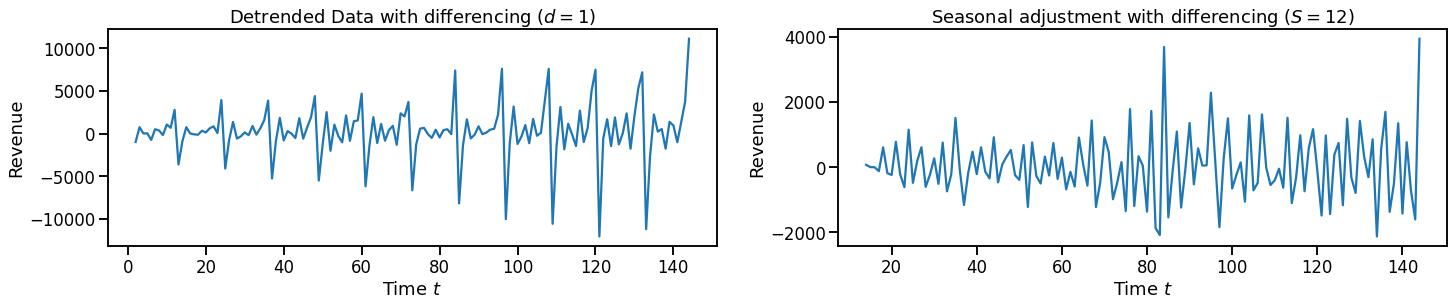

In [110]:
revenue_df['mdollars_diff_adj'] = revenue_df['mdollars_diff'].diff(periods=12)

f, axes = plt.subplots(1, 2, figsize=(24, 4))
axes[0].set_title('Detrended Data with differencing ($d=1$)')
axes[0].plot(X, revenue_df['mdollars_diff'])
axes[0].set_xlabel('Time $t$')
axes[0].set_ylabel('Revenue')

axes[1].set_title('Seasonal adjustment with differencing ($S=12$)')
axes[1].plot(X, revenue_df['mdollars_diff_adj'])
axes[1].set_xlabel('Time $t$')
axes[1].set_ylabel('Revenue')
plt.show()